In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import folium

In [89]:
import os

path = "./data"
file_list = os.listdir(path)

print ("file_list: {}".format(file_list))

file_list: ['codeBook_v3.xlsx', 'crime.csv', 'KP2020.csv', 'KP2021.csv', 'NPA2020.csv', '~$codeBook_v3.xlsx']


#### 파일 불러오기

In [90]:
codeBook = pd.read_excel('./data/codeBook_v3.xlsx')
col_define_kp = pd.read_excel('./data/codeBook_v3.xlsx', sheet_name='컬럼정의서_kp')
col_define_npa = pd.read_excel('./data/codeBook_v3.xlsx', sheet_name='컬럼정의서_npa')
kp2020 = pd.read_csv('./data/KP2020.csv',encoding='cp949')
kp2021 = pd.read_csv('./data/KP2021.csv',encoding='cp949')
npa2020 = pd.read_csv('./data/NPA2020.csv',encoding='cp949')

#### 컬럼 딕셔너리, 컬럼별 코드 호출

In [91]:
codeBook.head()

,No,컬럼명,컬럼 그룹,코드명,코드값
0,1,NPA_CL,경찰청 구분,본청,1
1,2,NPA_CL,경찰청 구분,서울청,8
2,3,NPA_CL,경찰청 구분,부산청,9
3,4,NPA_CL,경찰청 구분,대구청,10
4,5,NPA_CL,경찰청 구분,인천청,11


In [92]:
col_define_kp

,No.,ColumnName,DataType,Null,Comment
0,1,RECV_DEPT_NM,VARCHAR2 (20 Byte),N,접수부서코드
1,2,RECV_CPLT_DM,VARCHAR2 (8 Byte),Y,접수완료일시
2,3,NPA_CL,VARCHAR2 (2 Byte),N,경찰청구분
3,4,EVT_STAT_CD,VARCHAR2 (2 Byte),Y,사건상태코드
4,5,EVT_CL_CD,VARCHAR2 (3 Byte),Y,사건종별코드
5,6,RPTER_SEX,VARCHAR2 (1 Byte),Y,신고성별
6,7,HPPN_PNU_ADDR,VARCHAR2 (30 Byte),Y,발생지점
7,8,HPPN_X,"NUMBER (12,8)",Y,발생좌표X
8,9,HPPN_Y,"NUMBER (12,8)",Y,발생좌표Y
9,10,SME_EVT_YN,VARCHAR2 (1 Byte),Y,동일사건여부


In [93]:
col_define_npa


,No.,ColumnName,DataType,Null,Comment
0,1,RECV_CPLT_DT,VARCHAR2 (8 Byte),Y,접수완료일자
1,2,RECV_CPLT_TM,VARCHAR2 (6 Byte),Y,접수완료시간
2,3,NPA_CL,VARCHAR2 (2 Byte),N,경찰청구분
3,4,EVT_STAT_CD,VARCHAR2 (2 Byte),Y,사건상태코드
4,5,EVT_CL_CD,VARCHAR2 (3 Byte),Y,사건종별코드
5,6,RPTER_SEX,VARCHAR2 (1 Byte),Y,신고성별
6,7,HPPN_OLD_ADDR,VARCHAR2 (30 Byte),Y,발생구주소
7,8,HPPN_X,"NUMBER (12,8)",Y,발생좌표X
8,9,HPPN_Y,"NUMBER (12,8)",Y,발생좌표Y
9,10,SME_EVT_YN,VARCHAR2 (1 Byte),Y,동일사건여부


In [94]:
# 영어컬럼명과 한글컬럼명 매칭
kp_col_name = dict(zip(col_define_kp['ColumnName'].tolist(),col_define_kp['Comment'].tolist()))
npa_col_name = dict(zip(col_define_npa['ColumnName'].tolist(),col_define_npa['Comment'].tolist()))

In [95]:
npa_cl_code_dict = dict(zip(codeBook.loc[codeBook['컬럼명'] == 'NPA_CL']['코드값'].astype(str).tolist(
), codeBook.loc[codeBook['컬럼명'] == 'NPA_CL']['코드명'].tolist()))
npa_cl_code_dict


{'1': '본청',
 '8': '서울청',
 '9': '부산청',
 '10': '대구청',
 '11': '인천청',
 '12': '광주청',
 '13': '대전청',
 '14': '울산청',
 '15': '경기남부청',
 '16': '경기북부청',
 '17': '강원청',
 '18': '충북청',
 '19': '충남청',
 '20': '전북청',
 '21': '전남청',
 '22': '경북청',
 '23': '경남청',
 '24': '제주청',
 '31': '세종청'}

In [96]:
#CODEBOOK에서 숫자로 되어있는 코드 가져오기
def get_code_dict(col_name):
    get_sub_df = codeBook.loc[codeBook['컬럼명'] == col_name]
    return dict(zip(get_sub_df['코드값'].astype(str).tolist(), get_sub_df['코드명'].tolist()))


In [97]:
npa_cl_code_dict = get_code_dict('NPA_CL')
evt_stat_cd_code_dict = get_code_dict('EVT_STAT_CD')
evt_cl_cd_code_dict = get_code_dict('EVT_CL_CD')
sex_code_dict = get_code_dict('RPTER_SEX')

#### KP합쳐주고 숫자코드와 컬럼명 바꿔주기

In [98]:
kp2020.head(10)
display(kp2020)

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,충남청,20/12/01 01:43:07.000000000,19,10,305,1.0,충청남도 보령시 궁촌동(행정:대천4동) 369,126.598345,36.341537,Y
1,대전청,20/12/01 02:05:04.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
2,대전청,20/12/01 02:06:52.000000000,13,10,601,1.0,NaN,127.404663,36.341685,NaN
3,충남청,20/12/01 02:37:25.000000000,19,10,606,3.0,충청남도 보령시 천북면 하만리 628-10,126.524980,36.474390,N
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN
...,...,...,...,...,...,...,...,...,...,...
77072,충남청,20/12/31 01:18:16.000000000,19,10,302,2.0,충청남도 보령시 주교면 주교리(행정:주교면) 191-6,126.571002,36.387791,NaN
77073,충남청,20/12/31 01:17:45.000000000,19,10,501,3.0,NaN,NaN,NaN,NaN
77074,충남청,20/12/31 00:13:50.000000000,19,10,604,3.0,충청남도 아산시 온천동(행정:온양1동) 1498,127.000391,36.788411,NaN
77075,대전청,20/12/31 00:49:29.000000000,13,10,302,2.0,대전광역시 서구 갈마동(행정:갈마2동) 975,127.373351,36.348051,Y


In [99]:
kp2021.head(10)
display(kp2021)

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,대전청,21/03/07 00:00:01.000000000,13,10,604,3.0,대전광역시 서구 둔산동 1122,127.373676,36.350975,Y
1,대전청,21/03/07 00:02:13.000000000,13,10,201,1.0,대전광역시 유성구 상대동(원신흥동) 469-9,127.339018,36.347420,NaN
2,대전청,21/03/07 00:00:33.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
3,대전청,21/03/07 00:01:18.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
4,대전청,21/03/07 00:01:43.000000000,13,10,308,1.0,대전광역시 중구 선화동 141-16,127.420455,36.330413,NaN
...,...,...,...,...,...,...,...,...,...,...
2594055,대전청,23/01/12 11:23:09.000000000,13,10,104,1.0,대전광역시 유성구 봉명동 (행정:원신흥동 ) 1016-7,127.344600,36.352272,NaN
2594056,충남청,23/01/16 11:59:47.000000000,19,10,307,2.0,충청남도 서산시 음암면 부장리(음암면 ) 560-4,126.514047,36.785626,NaN
2594057,충남청,23/01/16 11:58:54.000000000,19,10,601,3.0,NaN,NaN,NaN,NaN
2594058,충남청,23/01/14 01:00:47.000000000,19,10,601,3.0,NaN,NaN,NaN,NaN


In [100]:
npa2020.head(10)
display(npa2020)

,RECV_CPLT_DT,RECV_CPLT_TM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_OLD_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,20200101,7,13,10,501,2,대전광역시 중구 목동(행정:목동) 360,127.409270,36.333010,Y
1,20200101,132,13,10,501,1,대전광역시 중구 대흥동(대흥동) 499-1,127.421295,36.325575,NaN
2,20200101,39,13,10,501,1,NaN,127.404663,36.341685,NaN
3,20200101,110,13,10,601,3,NaN,0.000000,0.000000,NaN
4,20200101,342,13,10,601,1,NaN,127.404663,36.341685,NaN
...,...,...,...,...,...,...,...,...,...,...
1178239,20201122,3505,19,10,501,1,,NaN,NaN,
1178240,20201122,5213,13,10,601,,,127.404663,36.341685,
1178241,20201122,4627,19,10,601,1,,NaN,NaN,Y
1178242,20201122,5246,19,5,301,1,충청남도 보령시 신흑동(행정:대천5동),126.516040,36.305619,


In [101]:
kp = pd.concat([kp2020,kp2021])
kp.head(10)
display(kp)

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,충남청,20/12/01 01:43:07.000000000,19,10,305,1.0,충청남도 보령시 궁촌동(행정:대천4동) 369,126.598345,36.341537,Y
1,대전청,20/12/01 02:05:04.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
2,대전청,20/12/01 02:06:52.000000000,13,10,601,1.0,NaN,127.404663,36.341685,NaN
3,충남청,20/12/01 02:37:25.000000000,19,10,606,3.0,충청남도 보령시 천북면 하만리 628-10,126.524980,36.474390,N
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN
...,...,...,...,...,...,...,...,...,...,...
2594055,대전청,23/01/12 11:23:09.000000000,13,10,104,1.0,대전광역시 유성구 봉명동 (행정:원신흥동 ) 1016-7,127.344600,36.352272,NaN
2594056,충남청,23/01/16 11:59:47.000000000,19,10,307,2.0,충청남도 서산시 음암면 부장리(음암면 ) 560-4,126.514047,36.785626,NaN
2594057,충남청,23/01/16 11:58:54.000000000,19,10,601,3.0,NaN,NaN,NaN,NaN
2594058,충남청,23/01/14 01:00:47.000000000,19,10,601,3.0,NaN,NaN,NaN,NaN


In [102]:
kp.reset_index(drop=True, inplace=True)

In [103]:
kp.loc[kp['RPTER_SEX'].isna(), 'RPTER_SEX'] = 3

In [104]:
kp['RPTER_SEX'] = kp['RPTER_SEX'].astype(int)

In [105]:
kp[['NPA_CL','EVT_STAT_CD','EVT_CL_CD','RPTER_SEX']] = kp[['NPA_CL','EVT_STAT_CD','EVT_CL_CD','RPTER_SEX']].astype(str)
npa2020[['NPA_CL', 'EVT_STAT_CD', 'EVT_CL_CD', 'RPTER_SEX']] = npa2020[['NPA_CL', 'EVT_STAT_CD', 'EVT_CL_CD', 'RPTER_SEX']].astype(str)

In [106]:
kp['NPA_CL'] = kp['NPA_CL'].map(npa_cl_code_dict)
kp['EVT_STAT_CD'] = kp['EVT_STAT_CD'].map(evt_stat_cd_code_dict)
kp['EVT_CL_CD'] = kp['EVT_CL_CD'].map(evt_cl_cd_code_dict)
kp['RPTER_SEX'] = kp['RPTER_SEX'].map(sex_code_dict)

In [107]:
sex_code_dict['{'] = '불상'
sex_code_dict[' '] = '불상'
sex_code_dict

{'1': '남성', '2': '여성', '3': '불상', '{': '불상', ' ': '불상'}

In [108]:
npa2020['NPA_CL'] = npa2020['NPA_CL'].map(npa_cl_code_dict)
npa2020['EVT_STAT_CD'] = npa2020['EVT_STAT_CD'].map(evt_stat_cd_code_dict)
npa2020['EVT_CL_CD'] = npa2020['EVT_CL_CD'].map(evt_cl_cd_code_dict)
npa2020['RPTER_SEX'] = npa2020['RPTER_SEX'].map(sex_code_dict)


In [109]:
kp = kp.rename(columns=kp_col_name)
npa = npa2020.rename(columns=npa_col_name)

#### 데이터프레임 기술통계 확인

In [110]:
kp.head()

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표X,발생좌표Y,동일사건여부
0,충남청,20/12/01 01:43:07.000000000,충남청,종결요청,주취자,남성,충청남도 보령시 궁촌동(행정:대천4동) 369,126.598345,36.341537,Y
1,대전청,20/12/01 02:05:04.000000000,대전청,종결요청,내용확인불가,불상,NaN,127.404663,36.341685,NaN
2,대전청,20/12/01 02:06:52.000000000,대전청,종결요청,내용확인불가,남성,NaN,127.404663,36.341685,NaN
3,충남청,20/12/01 02:37:25.000000000,충남청,종결요청,기타_타기관,불상,충청남도 보령시 천북면 하만리 628-10,126.524980,36.474390,N
4,충남청,20/12/01 08:17:50.000000000,충남청,종결요청,교통사고,여성,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN


In [111]:
kp['접수완료일시']

0          20/12/01 01:43:07.000000000
1          20/12/01 02:05:04.000000000
2          20/12/01 02:06:52.000000000
3          20/12/01 02:37:25.000000000
4          20/12/01 08:17:50.000000000
                      ...             
2671132    23/01/12 11:23:09.000000000
2671133    23/01/16 11:59:47.000000000
2671134    23/01/16 11:58:54.000000000
2671135    23/01/14 01:00:47.000000000
2671136    23/01/14 01:22:31.000000000
Name: 접수완료일시, Length: 2671137, dtype: object

In [112]:
kp.dtypes

접수부서코드     object
접수완료일시     object
경찰청구분      object
사건상태코드     object
사건종별코드     object
신고성별       object
발생지점       object
발생좌표X     float64
발생좌표Y     float64
동일사건여부     object
dtype: object

In [113]:
#kp에서 접수부서는 충남청이 제일 높음
#발생지점은 김제시가 높다...?
#동일사건여부가 kp에서는 많다
kp.describe(include='object')

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,동일사건여부
count,2671137,2671137,2671137,2671137,2671137,2671137,1569771,528379
unique,26,2592090,18,8,57,3,501580,2
top,충남청,22/09/04 04:41:51.000000000,충남청,종결요청,내용확인불가,남성,전라북도 김제시 상동동(검산동) 536,Y
freq,1590623,9,1479674,2667137,876663,1133679,12308,492288


In [114]:
npa

,접수완료일자,접수완료시간,경찰청구분,사건상태코드,사건종별코드,신고성별,발생구주소,발생좌표X,발생좌표Y,동일사건여부
0,20200101,7,대전청,종결요청,상담문의,여성,대전광역시 중구 목동(행정:목동) 360,127.409270,36.333010,Y
1,20200101,132,대전청,종결요청,상담문의,남성,대전광역시 중구 대흥동(대흥동) 499-1,127.421295,36.325575,NaN
2,20200101,39,대전청,종결요청,상담문의,남성,NaN,127.404663,36.341685,NaN
3,20200101,110,대전청,종결요청,내용확인불가,불상,NaN,0.000000,0.000000,NaN
4,20200101,342,대전청,종결요청,내용확인불가,남성,NaN,127.404663,36.341685,NaN
...,...,...,...,...,...,...,...,...,...,...
1178239,20201122,3505,충남청,종결요청,상담문의,남성,,NaN,NaN,
1178240,20201122,5213,대전청,종결요청,내용확인불가,불상,,127.404663,36.341685,
1178241,20201122,4627,충남청,종결요청,내용확인불가,남성,,NaN,NaN,Y
1178242,20201122,5246,충남청,도착,시비,남성,충청남도 보령시 신흑동(행정:대천5동),126.516040,36.305619,


In [115]:
npa.dtypes

접수완료일자      int64
접수완료시간      int64
경찰청구분      object
사건상태코드     object
사건종별코드     object
신고성별       object
발생구주소      object
발생좌표X     float64
발생좌표Y     float64
동일사건여부     object
dtype: object

In [116]:
#경찰청구분, 사건상태코드, 사건종별코드, 신고성별 코드 정리 필요
npa.describe()

,접수완료일자,접수완료시간,발생좌표X,발생좌표Y
count,1.178244e+06,1.178244e+06,1.076591e+06,1.076591e+06
mean,2.020063e+07,1.323090e+05,1.068373e+02,3.067067e+01
std,3.011115e+02,6.862015e+04,4.660213e+01,1.338051e+01
min,2.020010e+07,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.020040e+07,8.422000e+04,1.266442e+02,3.631000e+01
50%,2.020062e+07,1.425560e+05,1.271483e+02,3.634657e+01
75%,2.020090e+07,1.905160e+05,1.274047e+02,3.672590e+01
max,2.020112e+07,2.359590e+05,1.309080e+02,1.270941e+02


In [117]:
#npa는 신고성별 
npa.describe(include='object')

,경찰청구분,사건상태코드,사건종별코드,신고성별,발생구주소,동일사건여부
count,1178244,1178244,1178244,1178244,919651,581443
unique,2,6,57,3,252833,3
top,충남청,종결요청,내용확인불가,남성,,
freq,726251,1172635,349662,571351,155733,365910


In [118]:
npa['신고성별']

0          여성
1          남성
2          남성
3          불상
4          남성
           ..
1178239    남성
1178240    불상
1178241    남성
1178242    남성
1178243    불상
Name: 신고성별, Length: 1178244, dtype: object

### EDA

#### 접수부서코드와 경찰청구분

In [119]:
kp.head()

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표X,발생좌표Y,동일사건여부
0,충남청,20/12/01 01:43:07.000000000,충남청,종결요청,주취자,남성,충청남도 보령시 궁촌동(행정:대천4동) 369,126.598345,36.341537,Y
1,대전청,20/12/01 02:05:04.000000000,대전청,종결요청,내용확인불가,불상,NaN,127.404663,36.341685,NaN
2,대전청,20/12/01 02:06:52.000000000,대전청,종결요청,내용확인불가,남성,NaN,127.404663,36.341685,NaN
3,충남청,20/12/01 02:37:25.000000000,충남청,종결요청,기타_타기관,불상,충청남도 보령시 천북면 하만리 628-10,126.524980,36.474390,N
4,충남청,20/12/01 08:17:50.000000000,충남청,종결요청,교통사고,여성,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN


In [120]:
#접수부서코드는 전부 충남,대전,세종쪽
#그 중 충남청과 대전청의 비율을 합치면 대부분 비중을 차지하고 있다.

#남은 짜잘한 것 묶기
kp['접수부서코드'].value_counts(normalize=True)

충남청         0.595485
대전청         0.398439
대전역지구대      0.000942
남대전지구대      0.000817
서대전지구대      0.000698
대전중부서       0.000478
대전동부서       0.000441
대전유성서       0.000412
세종로파출소      0.000362
대전대덕서       0.000301
대전둔산서       0.000295
대전서부서       0.000294
세종대왕파출소     0.000128
대전파출소       0.000119
대전동부        0.000101
대전중부        0.000101
대전둔산        0.000092
대전유성        0.000078
대전대덕        0.000073
세종청         0.000070
세종남부서       0.000062
세종서         0.000061
대전서부        0.000058
2지구대(충남)    0.000036
세종북부서       0.000030
세종          0.000029
Name: 접수부서코드, dtype: float64

In [121]:
kp.loc[kp['접수부서코드'] == '충남청','경찰청구분'].value_counts()


충남청      1473814
세종청        93867
경기남부청       6408
대전청         4095
서울청         3066
충북청         2710
전북청         1938
인천청          953
경기북부청        647
경북청          517
전남청          493
강원청          426
부산청          411
경남청          388
대구청          301
광주청          301
제주청          158
울산청          130
Name: 경찰청구분, dtype: int64

<AxesSubplot:xlabel='count', ylabel='접수부서코드'>

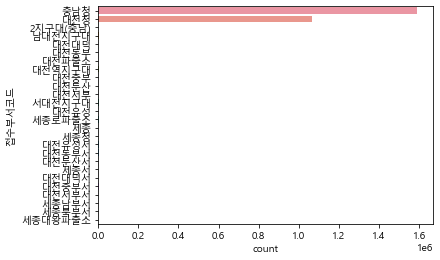

In [122]:
sns.countplot(data=kp, y='접수부서코드')

In [123]:
#경찰청구분는 전국 다양하다.
#하지만 역시 충남청과 대전청 비중이 95%, 세종이 3.5% 비중을 차지하고 있다.
kp['경찰청구분'].value_counts(normalize=True)


충남청      0.553949
대전청      0.398979
세종청      0.035846
경기남부청    0.002924
충북청      0.002394
서울청      0.002002
전북청      0.001138
인천청      0.000455
전남청      0.000374
경기북부청    0.000340
경북청      0.000324
부산청      0.000256
경남청      0.000244
강원청      0.000229
대구청      0.000203
광주청      0.000171
제주청      0.000097
울산청      0.000074
Name: 경찰청구분, dtype: float64

<AxesSubplot:xlabel='count', ylabel='경찰청구분'>

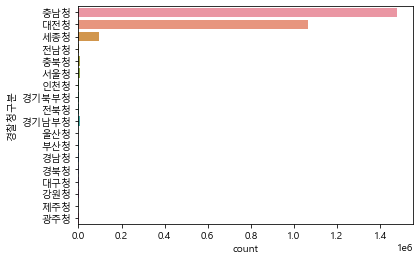

In [124]:
sns.countplot(data=kp, y='경찰청구분')

In [125]:
npa['경찰청구분'].value_counts(normalize=True)

충남청    0.616384
대전청    0.383616
Name: 경찰청구분, dtype: float64

#### 사건상태코드

In [126]:
kp['사건상태코드'].value_counts()

종결요청    2667137
도착         3386
타청이첩        366
초기지령        221
접수           17
네비종결          4
지령취소          3
접수중           3
Name: 사건상태코드, dtype: int64

In [127]:
npa['사건상태코드'].value_counts()

종결요청    1172635
도착         5565
네비종결         27
초기지령          7
접수중           6
접수            4
Name: 사건상태코드, dtype: int64

#### 사건종별코드

In [128]:
kp['사건종별코드'].value_counts()

내용확인불가        876663
상담문의          534004
위험방지          186886
교통사고          170789
시비             82985
기타형사범          64608
행패소란           62198
폭력             61925
음주운전           53280
소음             53213
주취자            43654
보호조치           42385
교통불편           38737
절도             36120
기타_타기관         35778
보이스피싱          35489
가정폭력           32237
교통위반           24811
실종(실종아동 등)     24150
비상벨            22661
분실습득           22271
자살             17763
청소년비행          14336
기타경범           12481
재물손괴           11957
데이트폭력          11256
무전취식승차         10339
풍속영업           10152
재해재난            9431
사기              9024
도박              8448
가출 등            7573
아동학대(가정내)       4507
변사자             4501
수배불심자           4475
서비스요청           3969
성폭력             3415
FTX             3337
구조요청            3043
스토킹             2993
주거침입            2657
학교폭력            2076
화재              1780
위험동물            1685
협박              1623
동물학대             882
아동학대(기타)         776
마약           

In [129]:
npa['사건종별코드'].value_counts()

내용확인불가        349662
상담문의          223409
교통사고           93659
위험방지           86150
시비             36034
폭력             30938
행패소란           29259
기타형사범          28777
분실습득           26359
기타_타기관         23319
주취자            23238
소음             22646
교통불편           21359
절도             18751
보호조치           17178
음주운전           16799
가정폭력           13369
교통위반           11088
보이스피싱          10779
비상벨             9470
실종(실종아동 등)      7398
화재              7315
자살              6951
무전취식승차          6411
재물손괴            6211
청소년비행           5689
풍속영업            5122
도박              5052
가출 등            4537
기타경범            4452
사기              3848
데이트폭력           3528
서비스요청           3004
구조요청            2984
변사자             2925
수배불심자           2119
아동학대(가정내)       1277
주거침입            1272
성폭력             1234
재해재난            1081
위험동물             796
협박               623
FTX              546
경비업체요청           334
스토킹              301
학교폭력             261
아동학대(기타)         227
납치감금         

#### 시간 컬럼 전처리

In [130]:
kp['접수완료일시'].head()

0    20/12/01 01:43:07.000000000
1    20/12/01 02:05:04.000000000
2    20/12/01 02:06:52.000000000
3    20/12/01 02:37:25.000000000
4    20/12/01 08:17:50.000000000
Name: 접수완료일시, dtype: object

In [138]:
kp['접수완료일시'] = kp['접수완료일시'].str.split('.').str[0]

In [141]:
kp['접수완료일시'] = pd.to_datetime(kp['접수완료일시'], format="%y/%m/%d %H:%M:%S")
kp['접수완료일시']

0         2020-12-01 01:43:07
1         2020-12-01 02:05:04
2         2020-12-01 02:06:52
3         2020-12-01 02:37:25
4         2020-12-01 08:17:50
                  ...        
2671132   2023-01-12 11:23:09
2671133   2023-01-16 11:59:47
2671134   2023-01-16 11:58:54
2671135   2023-01-14 01:00:47
2671136   2023-01-14 01:22:31
Name: 접수완료일시, Length: 2671137, dtype: datetime64[ns]

In [143]:
kp['접수완료일시'].sort_values()

219       2020-12-01 00:00:54
168       2020-12-01 00:02:07
218       2020-12-01 00:02:08
217       2020-12-01 00:02:22
169       2020-12-01 00:03:18
                  ...        
2657589   2023-01-18 23:58:33
2660821   2023-01-18 23:58:39
2657026   2023-01-18 23:58:52
2656979   2023-01-18 23:59:40
2661118   2023-01-18 23:59:45
Name: 접수완료일시, Length: 2671137, dtype: datetime64[ns]

In [144]:
npa['접수완료시간'].astype(str).str.zfill(6)

0          000007
1          000132
2          000039
3          000110
4          000342
            ...  
1178239    003505
1178240    005213
1178241    004627
1178242    005246
1178243    001134
Name: 접수완료시간, Length: 1178244, dtype: object

In [146]:
npa['접수완료일시'] = pd.to_datetime(npa['접수완료일자'].astype(str)+npa['접수완료시간'].astype(str).str.zfill(6))

#### kp와 npa 합치기

In [147]:
npa.drop(['접수완료일자','접수완료시간'],axis=1,inplace=True)

In [148]:
npa['접수부서코드'] = npa['경찰청구분'].copy()

In [149]:
crime = pd.concat([kp,npa])

In [150]:
crime.shape

(3849381, 11)

In [151]:
crime.reset_index(drop=True, inplace=True)

In [152]:
crime

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표X,발생좌표Y,동일사건여부,발생구주소
0,충남청,2020-12-01 01:43:07,충남청,종결요청,주취자,남성,충청남도 보령시 궁촌동(행정:대천4동) 369,126.598345,36.341537,Y,NaN
1,대전청,2020-12-01 02:05:04,대전청,종결요청,내용확인불가,불상,NaN,127.404663,36.341685,NaN,NaN
2,대전청,2020-12-01 02:06:52,대전청,종결요청,내용확인불가,남성,NaN,127.404663,36.341685,NaN,NaN
3,충남청,2020-12-01 02:37:25,충남청,종결요청,기타_타기관,불상,충청남도 보령시 천북면 하만리 628-10,126.524980,36.474390,N,NaN
4,충남청,2020-12-01 08:17:50,충남청,종결요청,교통사고,여성,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3849376,충남청,2020-11-22 00:35:05,충남청,종결요청,상담문의,남성,NaN,NaN,NaN,,
3849377,대전청,2020-11-22 00:52:13,대전청,종결요청,내용확인불가,불상,NaN,127.404663,36.341685,,
3849378,충남청,2020-11-22 00:46:27,충남청,종결요청,내용확인불가,남성,NaN,NaN,NaN,Y,
3849379,충남청,2020-11-22 00:52:46,충남청,도착,시비,남성,NaN,126.516040,36.305619,,충청남도 보령시 신흑동(행정:대천5동)


In [153]:
crime.to_csv('./data/crime.csv',index=False)